In [1]:
# download data from https://cellxgene.cziscience.com/collections/4195ab4c-20bd-4cd3-8b3d-65601277e731
import os, sys
HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh, Vis_Handler as vh
import umap, numpy as np, pandas as pd, scanpy as sc

sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 3

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["breast"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

     Harmony, 50
Provided_x_pca, 30
Provided_x_umap, 2
   Scanorama, 100
     X_bbknn, 2
       X_pca, 50
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2


In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [4]:
adata

AnnData object with n_obs × n_vars = 703512 × 1000
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'donor_menopausal_status', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'suspension_depleted_cell_types', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'tissue_location', 'bmi_group', 'procedure_group', 'age

In [5]:
del adata.obsm

In [6]:
adata.write(rf"{dh.DATA_DIR}/breast/emb_hvg.h5ad", compression="gzip")

### Process from Raw

In [2]:
adata = sc.read_h5ad(dh.DATA_RAW_["breast"])

In [3]:
adata

AnnData object with n_obs × n_vars = 714331 × 33234
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'donor_menopausal_status', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'suspension_depleted_cell_types', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'tissue_location', 'bmi_group', 'procedure_group', 'ag

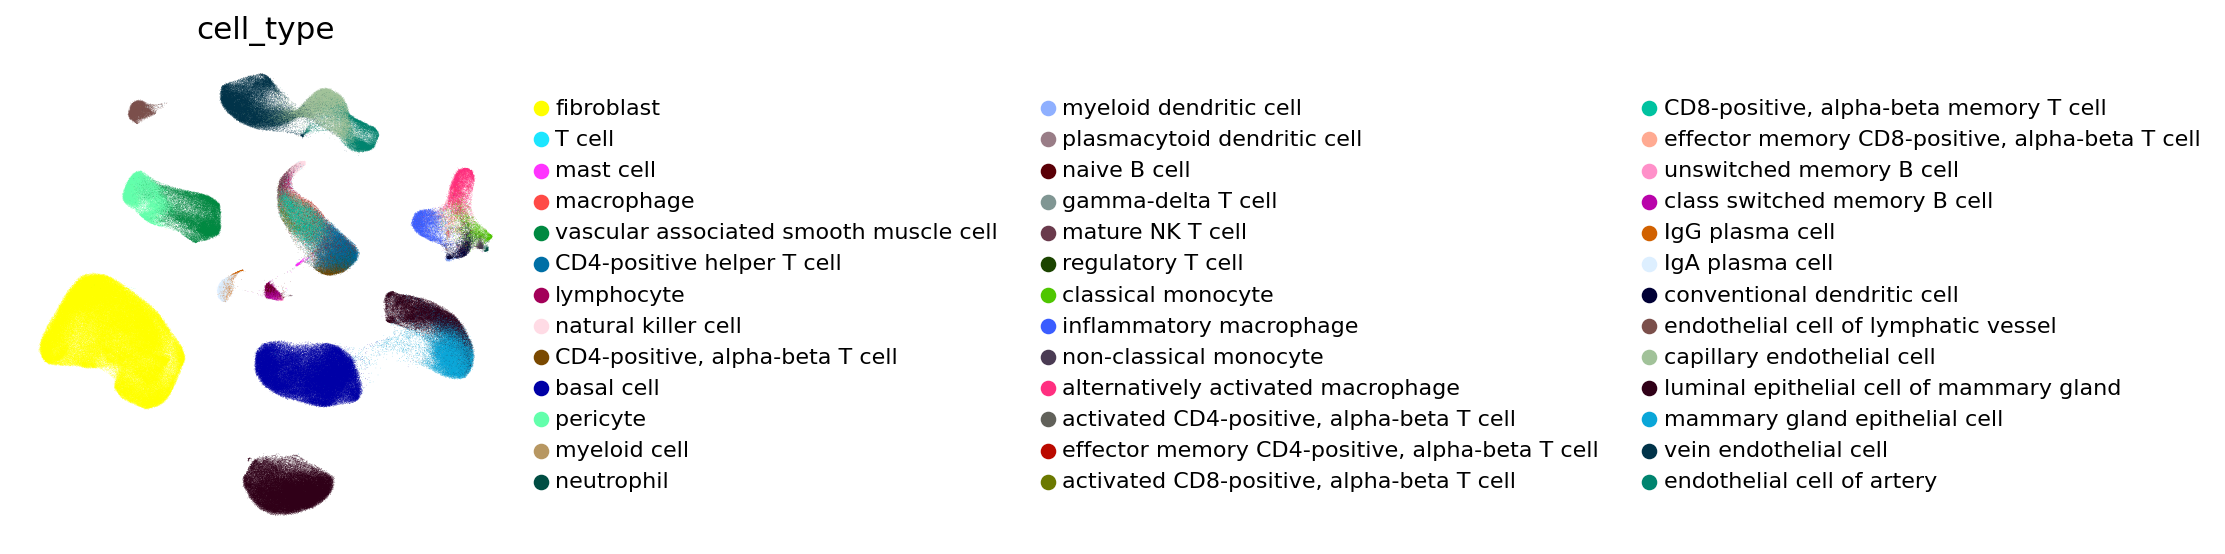

In [4]:
sc.pl.embedding(
    adata,
    basis="X_umap",
    color=["cell_type"],
    **vh.cfg
)

In [5]:
adata.obs["sample_id"].unique()

['hbca_c01', 'hbca_c02', 'hbca_c03', 'hbca_c04', 'hbca_c05', ..., 'hbca_c90', 'hbca_c91', 'hbca_c96', 'hbca_c97', 'hbca_c150']
Length: 167
Categories (167, object): ['hbca_c01', 'hbca_c02', 'hbca_c03', 'hbca_c04', ..., 'hbca_c164', 'hbca_c165', 'hbca_c166', 'hbca_c167']

In [6]:
adata.obs["donor_id"].unique()

['P01', 'P02', 'P03', 'P04', 'P05', ..., 'P104', 'P49', 'P41', 'P61', 'P109']
Length: 126
Categories (126, object): ['P01', 'P02', 'P03', 'P04', ..., 'P123', 'P124', 'P125', 'P126']

In [7]:
adata.X = adata.raw.X
del adata.raw
uh.preprocess(adata)

filtered out 9954 cells that have less than 1000 counts
filtered out 865 cells that have less than 500 genes expressed
filtered out 3803 genes that are detected in less than 5 cells
29431 genes x 703512 cells after quality control.
normalizing by total count per cell
    finished (0:00:07): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 703512 × 29431
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'donor_menopausal_status', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'suspension_depleted_cell_types', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'tissue_location', 'bmi_group', 'procedure_group', 'ag

In [8]:
adata.obsm.keys()

KeysView(AxisArrays with keys: X_pca, X_umap)

In [9]:
uh.umaps_rawcounts(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:05:40)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:07:56)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:11:45)


AnnData object with n_obs × n_vars = 703512 × 29431
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'donor_menopausal_status', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'suspension_depleted_cell_types', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'tissue_location', 'bmi_group', 'procedure_group', 'ag

In [10]:
adata.write(dh.DATA_EMB_["breast"], compression="gzip")

### Save some metadata

In [3]:
adata = sc.read_h5ad(dh.DATA_EMB_["breast"])

In [4]:
adata

AnnData object with n_obs × n_vars = 703512 × 29431
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'donor_menopausal_status', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'donor_BMI_at_collection', 'suspension_depleted_cell_types', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_dissociation_time', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'disease_ontology_term_id', 'sex_ontology_term_id', 'n_count_rna', 'n_feature_rna', 'percent_mito', 'percent_rb', 'tissue_location', 'bmi_group', 'procedure_group', 'ag

In [7]:
os.makedirs(rf"{dh.META_DIR}/breast/", exist_ok=True)

In [8]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["cell_type"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/breast/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["donor_id"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/breast/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()